# python hands-on session

By: Ties de Kok  
Version: Python 2.7 (see any notes for Python 3.5)

1. handling files
2. data handling
3. web scraping
4. text mining
5. **(interactive) visualisations**

## Introduction

There are many, many, many different packages available to create visualisations in Python.  

A basic distinction can be made between packages that use `matplotlib` in the background and packages that do not. 

**Note:** We want our visualisations to appear in the Notebook, so we need to start with:

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Quick visualisations using Pandas

http://pandas.pydata.org/pandas-docs/stable/visualization.html  

Pandas already comes with additional functionality to turn data in a DataFrame into a `matplotlib` visualisation.

Personally, I only use these for inspection purposes. If I want to share them I will use Seaborn instead (discussed later).

### Load some data

In [3]:
df_auto = pd.read_csv(r'auto_df.csv', sep=';', index_col='Unnamed: 0')

### Example from the documentation

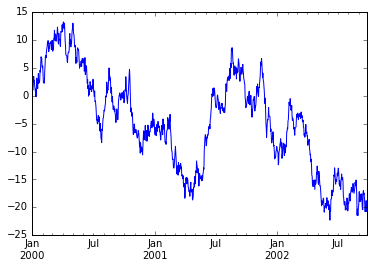

In [4]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

### Bar plot

http://pandas.pydata.org/pandas-docs/stable/visualization.html#bar-plots

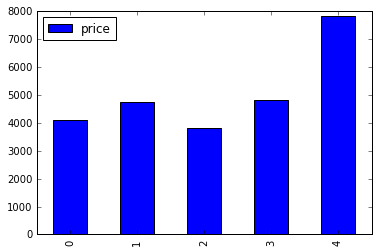

In [5]:
df_auto.iloc[0:5][['price']].plot.bar()

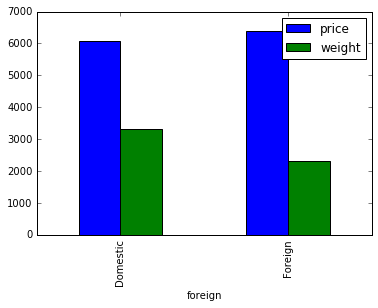

In [6]:
df_auto.groupby(['foreign']).mean()[['price', 'weight']].plot.bar()

### Histogram

http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms

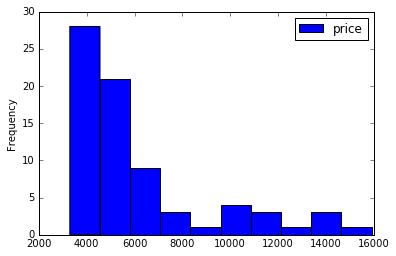

In [7]:
df_auto[['price']].plot.hist()

### Box plots

http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots

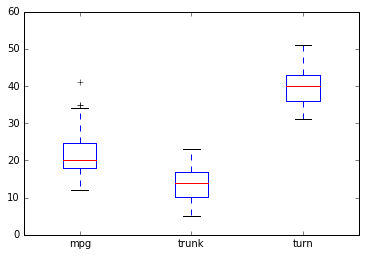

In [8]:
df_auto[['mpg', 'trunk', 'turn']].plot.box()

### Scatter plot

http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot

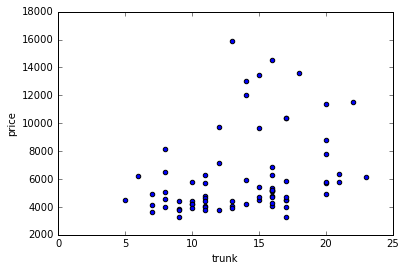

In [9]:
df_auto.plot.scatter(x='trunk', y='price')

*Note* you can safely ignore the error, it is a thing in matplotlib that has been fixed but due to dependencies is not yet installed.

### Pie plot

http://pandas.pydata.org/pandas-docs/stable/visualization.html#pie-plot

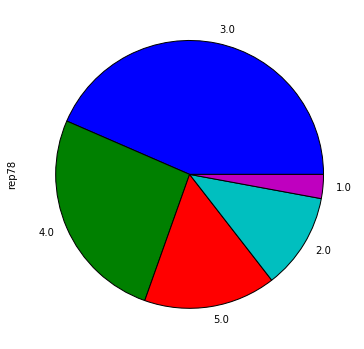

In [10]:
df_auto['rep78'].value_counts().plot.pie(figsize=(6, 6))

## More advanced visualisations using Seaborn

`Seaborn` is a really awesome package to create visualisations for Pandas dataframes: https://web.stanford.edu/~mwaskom/software/seaborn/  

You can install it via: `pip install seaborn`  

The main benefit of Seaborn is that it makes it easier to make pretty visualisations (using default `matplotlib` is a nightmare sometimes).

In [11]:
import seaborn as sns

C:\Users\kokti_000\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Set the style

https://web.stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html#styling-figures-with-axes-style-and-set-style

In [12]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

*Note* You can ignore the above, it just creates some data that we can use to show each style.

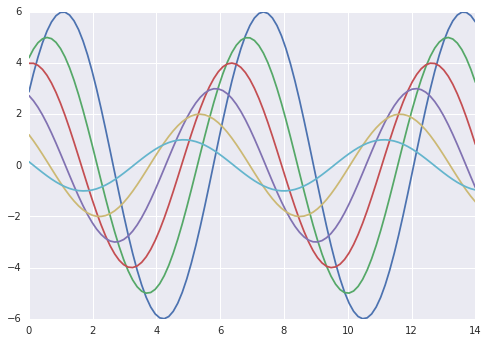

In [13]:
sns.set_style("darkgrid")
sinplot()

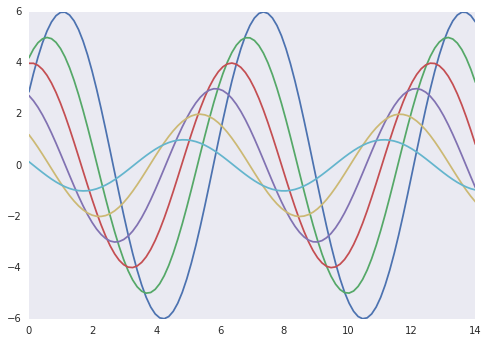

In [14]:
sns.set_style("dark")
sinplot()

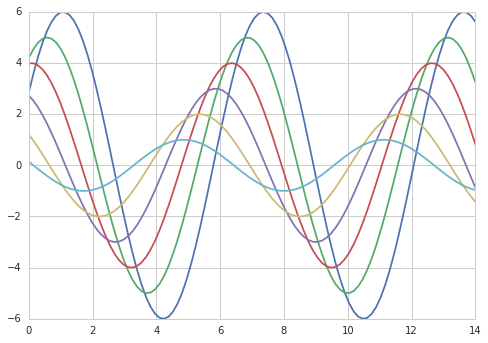

In [15]:
sns.set_style("whitegrid")
sinplot()

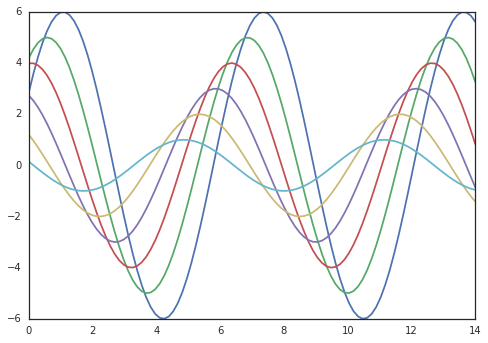

In [16]:
sns.set_style("white")
sinplot()

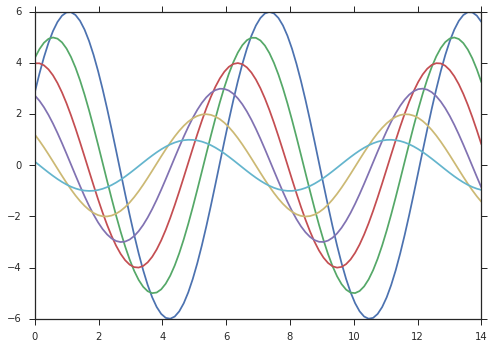

In [17]:
sns.set_style("ticks")
sinplot()

It is also possible to remove the 'spine' by using `sns.despine()`:

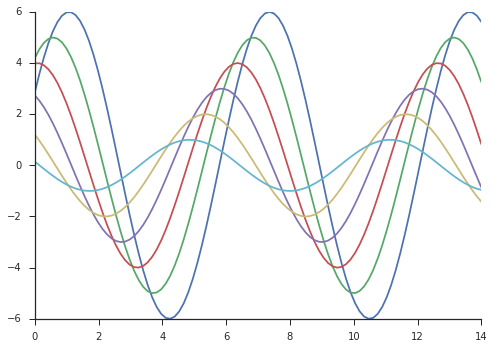

In [18]:
sinplot()
sns.despine()

### Set the colors

https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html

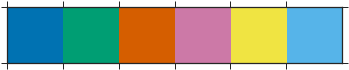

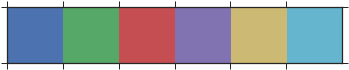

In [19]:
colorblind_palette = sns.color_palette('colorblind')
deep_palette = sns.color_palette('deep')

sns.palplot(colorblind_palette)
sns.palplot(deep_palette)

You can pass these color palettes to your plotting function

### Histogram

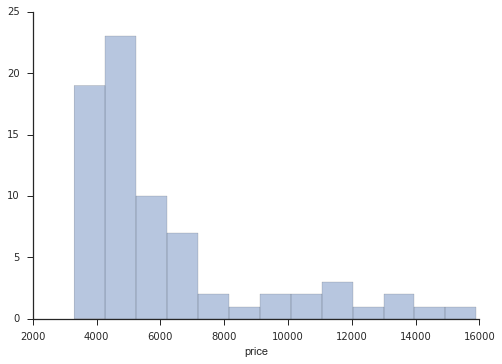

In [20]:
sns.distplot(df_auto['price'], kde=False)
sns.despine()

### Scatterplot

C:\Users\kokti_000\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


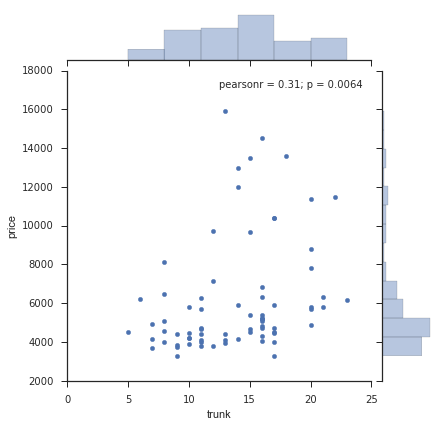

In [21]:
sns.jointplot(x="trunk", y="price", data=df_auto)

### Pairwise correlations

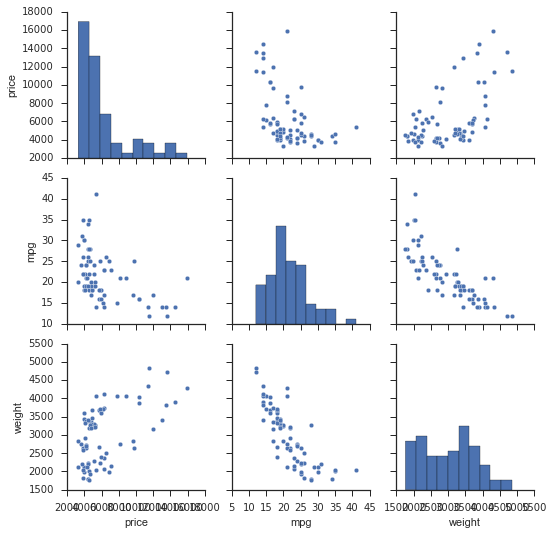

In [22]:
sns.pairplot(df_auto[['price', 'mpg', 'weight']])

### Plotting categorical data

Let's create some categorical columns:

In [23]:
df_auto['brand'] = [x.split(" ")[0] for x in df_auto['make']]
df_auto['headroom'] = ['big' if x > 2.5 else 'small' for x in df_auto['headroom']]
df_auto['weight_cat'] = pd.qcut(df_auto['weight'].values, 12, labels=range(0,12))

In [24]:
df_auto.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,brand,weight_cat
0,AMC Concord,4099,22,3,small,11,2930,186,40,121,3.58,Domestic,AMC,5
1,AMC Pacer,4749,17,3,big,11,3350,173,40,258,2.53,Domestic,AMC,7
2,AMC Spirit,3799,22,NaN,big,12,2640,168,35,121,3.08,Domestic,AMC,3
3,Buick Century,4816,20,3,big,16,3250,196,40,196,2.93,Domestic,Buick,6
4,Buick Electra,7827,15,4,big,20,4080,222,43,350,2.41,Domestic,Buick,11


### Bar plot

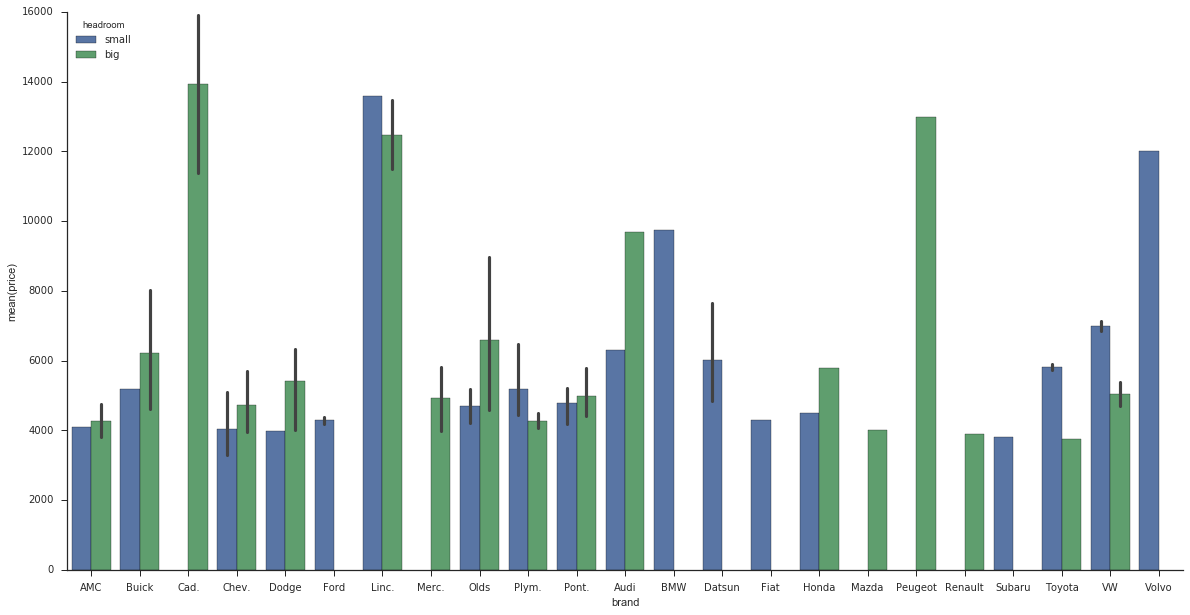

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x="brand", y="price", hue="headroom", data=df_auto)
sns.despine()

*Note:* we could pass our colorblind palette to this plot for example:

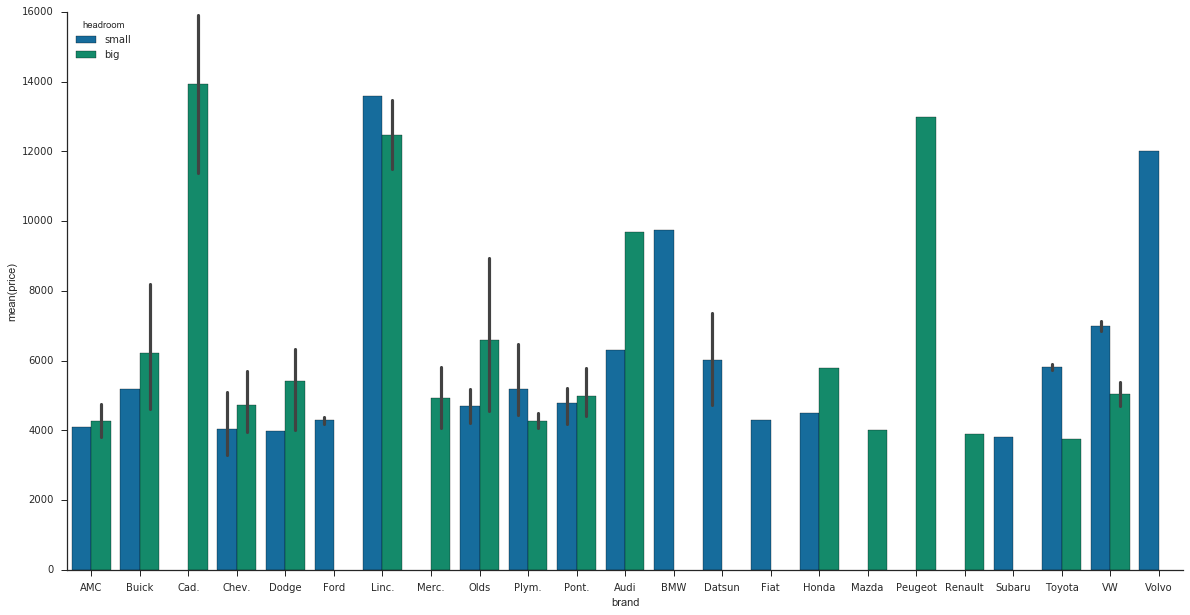

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x="brand", y="price", hue="headroom", data=df_auto, palette=colorblind_palette)
sns.despine()

### Count plot

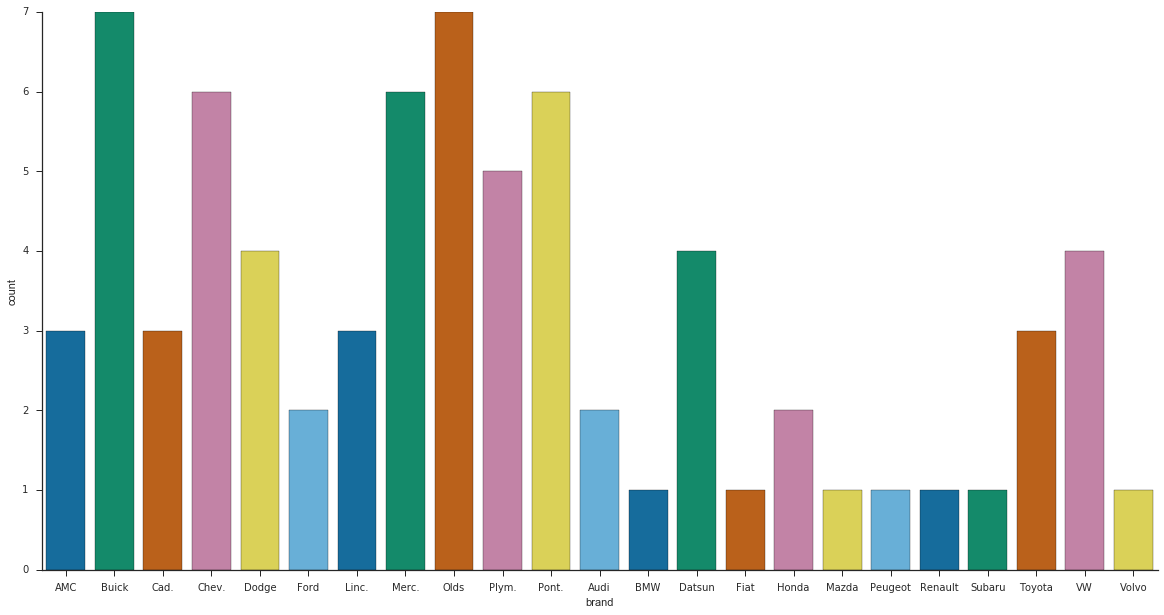

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x="brand", data=df_auto, palette=colorblind_palette)
sns.despine()

### Point plot

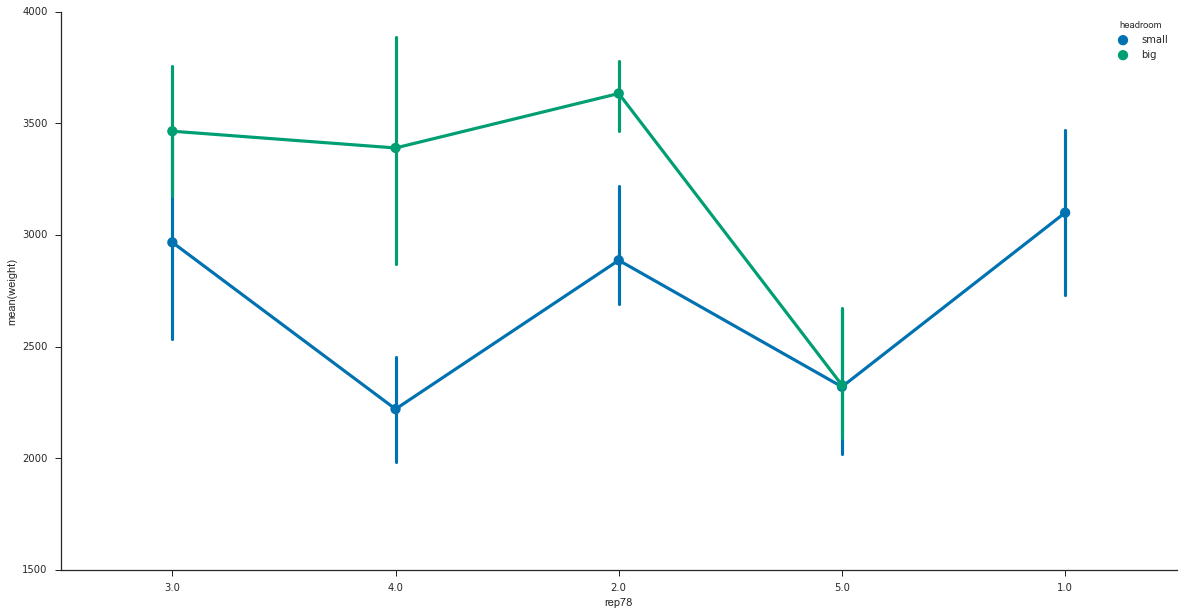

In [28]:
plt.figure(figsize=(20,10))
sns.pointplot(x="rep78", y="weight", hue='headroom',data=df_auto, palette=colorblind_palette)
sns.despine()

### Seaborn Grids

A powerful feature of `Seaborn` is the ability to create a visualisation with multiple graphs.  
https://web.stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html

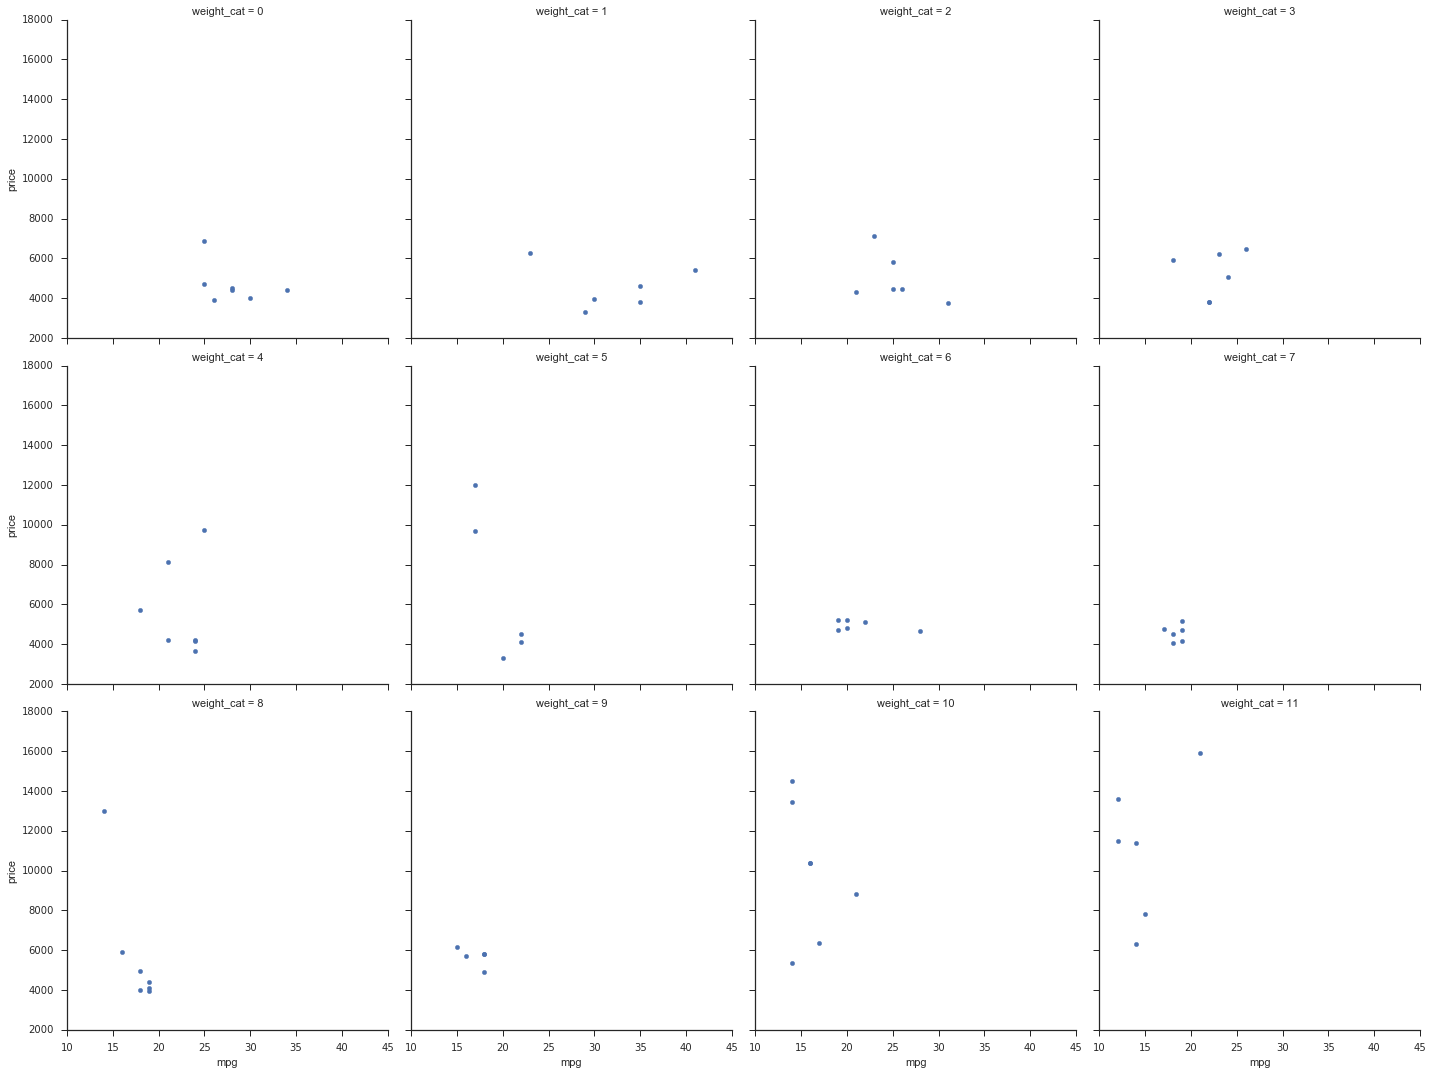

In [29]:
g = sns.FacetGrid(df_auto, col="weight_cat", col_wrap=4, size=5)
g.map(plt.scatter,"mpg", "price")

## Interactive visualisations

A cool library to create interactive visualizations from Pandas DataFrames is `Bokeh`: http://bokeh.pydata.org/en/latest/

Installation is best using: `conda install bokeh`  

For the extensive documentation see: http://bokeh.pydata.org/en/0.11.0/docs/user_guide/charts.html#making-high-level-charts

**Note:** These graphs will not show on GitHub.

In [30]:
from bokeh.io import output_notebook
from bokeh.charts import show

In [31]:
output_notebook()

Loading BokehJS ...

### Examples

In [32]:
from bokeh.charts import Bar
p = Bar(df_auto, 'weight_cat', values='mpg', title="Average MPG by Weight", agg='mean')
show(p)

In [33]:
from bokeh.charts import BoxPlot
p = BoxPlot(df_auto, values='mpg', label='weight_cat',
            title="MPG Summary (grouped by weight)")
show(p)

In [34]:
from bokeh.charts import Scatter
p = Scatter(df_auto, x='trunk', y='length', color='foreign',
            title="Length vs Trunk (shaded by Nationality)", legend="top_left",
            xlabel="Trunk", ylabel="Length")
show(p)

## Add interactivity through widgets

*Note* this is not the most elegant way to do this because it rerenders the entire figure. However, it is the easiest way to do it.

In [35]:
from ipywidgets import interact

In [36]:
def create_plot(brand='AMC'):
    data_df = df_auto[df_auto.brand == brand]
    p = Scatter(data_df, x='trunk', y='length', title="Length vs Trunk", legend="top_left", xlabel="Trunk", ylabel="Length")
    show(p)

In [37]:
brand_list = list(df_auto.groupby('brand').filter(lambda x: len(x) > 1).brand.unique())

*Note:* the above creates a list of brands that have more than 1 car model.

In [38]:
interact(create_plot, brand=brand_list)